In [81]:
import pandas as pd
date_cols = ['last_scraped','host_since','last_review','first_review','calendar_last_scraped']
listings = pd.read_csv('data/listings.csv',parse_dates=date_cols).dropna(how='all',axis=1)



/home/kalidus/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
boolean_cols = ['require_guest_phone_verification','requires_license','host_has_profile_pic',
          'host_identity_verified',
          'require_guest_profile_picture',
          'is_location_exact','instant_bookable']
for c in boolean_cols:
    listings.loc[:,c] = (listings[c]=='t').values

In [83]:
price_cols = ['price','weekly_price','monthly_price']
for p in price_cols:
    listings.loc[:,p] = listings[p].str.replace('$','')
    listings.loc[:,p] = listings[p].str.replace(',','')
    listings.loc[:,p] = pd.to_numeric(listings[p])

In [222]:
import numpy as np
def fix_zipcode(x):
    
    if x.startswith('E-'):
        x = x.lstrip('E-')
    if '\n' in x:
        x = x.split('\n')[0]
    if x[0]=='7':
        x = '0'+x
    if x=='':
        return np.nan
    nx = x.replace(' ','')[:5]
    if len(nx)==5:
        try:
            f = int(x.replace(' ','')[:5])
            return nx
        except:
            return np.nan
    else:
        return np.nan
listings['zipcode'] = listings.zipcode.fillna(' ').map(fix_zipcode)



import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def fix_mallorca(x):
    mall = ['majorque', 'majorqye', 'malllorca', 'mallorca', 'mallorca (illes balears)', 'maiorca', 'majorca','mallorca ' ]
    for m in mall:
        if m in x:
            x = x.replace(m,'Mallorca')
    return x.replace('(Mallorca)','').replace('(illes balears)','')

def fix_location(x):
    
    x = x.lstrip(' ')
    x = x.replace("'",'').replace('`','').replace("´",'').replace(" ,",',')
    
    x = fix_mallorca(x.lower())
    y = strip_accents(x).split(',')[0].rstrip('  ').rstrip(' ')
    return fix_regions(y)

def fix_sant(x):
    return x.replace(' de sant ',' sant ').replace(' de san ',' sant ').replace(' san ',' sant ')

def fix_regions(x):
    x = fix_sant(x)
    match = lambda x,li: any([it==x for it in li])
    caca = ['07310 campanet', '07330',  '07560', '07609', 'Mallorca', 'Mallorca island','пальма','baleares',
     'balearic islands',]
    bg = ['badia blava', 'badia de palma', 'badia gran',
         'badia gran/bahia azul', 'bahia grande', 'bahia grande (badia gran)']
    binisalem = ['binisalem', 'binissalem', 'binissalem-Mallorca do',]
    cmillor = ['cal millor Mallorca spain','cala millor','cala millor -son servera',]
    cdor =  'cala dor', 'cala dor - santanyi', 'cala dor-cala egos-portopetro','cala d or','santanyi / cala dor','santanyi cala egos'
    csvic = 'cala sant vicenc', 'cala sant vicent', 'cala sant vicente','cala st vicenc','pollensa. cala sant vicenc. illes balears',
    csantp = 'colonia sant pedro', 'colonia sant pere', 'colonia sant pere  (arta)',
    pmuro = 'platges de muro', 'platja de muro', 'platjes de muro', 'playa de muro', 'playa de muro baleares', 'playas de muro',
    x = x.replace('mendia','mandia').replace('vinyas','vinyes').replace('calas de ','cales de ').replace('picaford','picafort')
    x = x.replace('la clama','la calma').replace('de los pinos','dels pins').replace('deya', 'deia').replace('esporlas','esporles')
    x = x.replace('pollenca','pollensa').replace('pollenza','pollensa').replace('calla','cala')
    alcudia = ['']
    if match(x,caca):
        return ' '
    elif match(x,bg):
        return 'bahia grande'
    elif 'alcudia' in x:
        return 'alcudia'
    elif x=='andraxt':
        return 'andratx'
    elif 'arenal' in x:
        return 'arenal'
    elif x=='biniagual-binissalem-Mallorca':
        return 'biniagual'
    elif x=='binibona caimari':
        return x.split(' ')[0]
    elif match(x,binisalem):
        return 'binissalem'
    elif match(x,cmillor):
        return 'cala millor'
    elif match(x,cdor):
        return "cala d'or"
    elif match(x,csvic):
        return 'cala sant vicenc'
    elif match(x,pmuro):
        return 'platja de muro'
    elif match(x,csantp):
        return 'colonia sant pere'
    elif x=='bunola':
        return 'bunyola'
    elif 'cala figuera' in x:
        return 'cala figuera'
    elif 'cala major' in x:
        return 'cala major'
    elif 'cala anguila' in x:
        return 'cala anguila'
    elif 'cala serena' in x:
        return 'cala serena'
    elif 'calvia' in x:
        return 'calvia'
    elif 'rapita' in x:
        return 'sa rapita'
    elif 'campos' in x:
        return 'campos'
    elif 'galilea' in x:
        return 'galilea'
    elif 'porto colom' in x or 'portocolom' in x:
        return 'portocolom'
    elif 'porto petro' in x or 'portopetro' in x:
        return 'portopetro'
    elif 'porto cristo' in x or 'portocristo' in x or x=='porto de manacor':
        return 'portocristo'
    elif 'porreras' in x or 'porreres' in x:
        return 'porreres'
    elif 'portol' in x:
        return 'portol'
    else:
        return x
    
def final_fix_regions(x):
    x = fix_location(x).replace('  ',' ')
    if x in ['canyamel', 'canyamel - capdepera']:
        return 'canyamel'
    elif x in ['capdepera', 'capdepera-cala rajada',]:
        return 'capdepera'
    elif x in ['felanitx', 'felanitx (es carritxo)', 'felantix',]:
        return 'felanitx'
    elif 'fornalutx' in x:
        return 'fornalutx'
    elif x in ['illetas', 'illetes']:
        return 'illetes'
    elif 'crestatx' in x:
        return 'crestatx'
    elif x in ['la puebla', 'la puebla (sa pobla)', 'sa pobla']:
        return 'sa pobla'
    elif 'sa torre' in x:
        return 'sa torre'
    elif x in ['santa margalida', 'santa margarida', 'santa margarita']:
        return 'santa margalida'
    elif x in ['son serra de marin', 'son serra de marina', 'son serra de marrina']:
        return 'son serra de marina'
    elif 'son talent' in x:
        return 'son talent'
    elif 'son veri' in x:
        return 'son veri'
    elif x in ['vallgonera- cala pi', 'vallgornera', 'vallgornera nou']:
        return 'vallgornera'
    elif x in ['vilafranca', 'vilafranca de bonany', 'villafranca de bonany']:
        return 'vilafranca'
    elif 'estanyol' in x:
        return "s'estanyol"
    elif x in ['valldemoos', 'valldemossa',]:
        return 'valldemossa'
    elif x in ['santa ponca', 'santa ponsa', 'santa ponsa ( Mallorca)']:
        return 'santa ponsa'
    elif x in ['lloret', 'lloret de vista alegre', 'lloret de vistalegre',]:
        return 'lloret'
    elif x in ['lluchmajor', 'lluchmayor', 'llucmajor', 'llucmayor']:  
        return 'llucmajor'
    elif x in ['manacor - cales de Mallorca',  'manacor - cals de Mallorca']:
        return 'cales de mallorca'
    elif x in ['manacor - sespinagar',  'manacor espinagar',]:
        return 'manacor'
    elif x in ['palma', 'palma Mallorca', 'palma de Mallorca', 'palma di Mallorca', 'palma nova', 'palma/marratxi', 'palmade Mallorca']:
        return 'palma'
    elif x in ['alcanada','aucanada']:
        return 'alcanada'
    
    else:
        return x

listings['smart_location'] = listings['smart_location'].map(final_fix_regions)


ones = listings['smart_location'].value_counts()[listings['smart_location'].value_counts()<=2].index.values.tolist()

locs = listings[['latitude','longitude','smart_location']]

subs = {}
for x in ones:
    d0 = locs[locs['smart_location']==x][['latitude','longitude']].values[0]

    ix = np.linalg.norm(d0-locs[locs['smart_location']!=x][['latitude','longitude']].values,axis=1).argmin()

    subs[x] = locs[locs['smart_location']!=ones[0]].iloc[ix].smart_location
def clean_smart_locations(x):
    if x in subs.keys():
        return subs[x]
    else:
        return x

In [447]:
listings['smart_location'] = listings['smart_location'].map(clean_smart_locations)

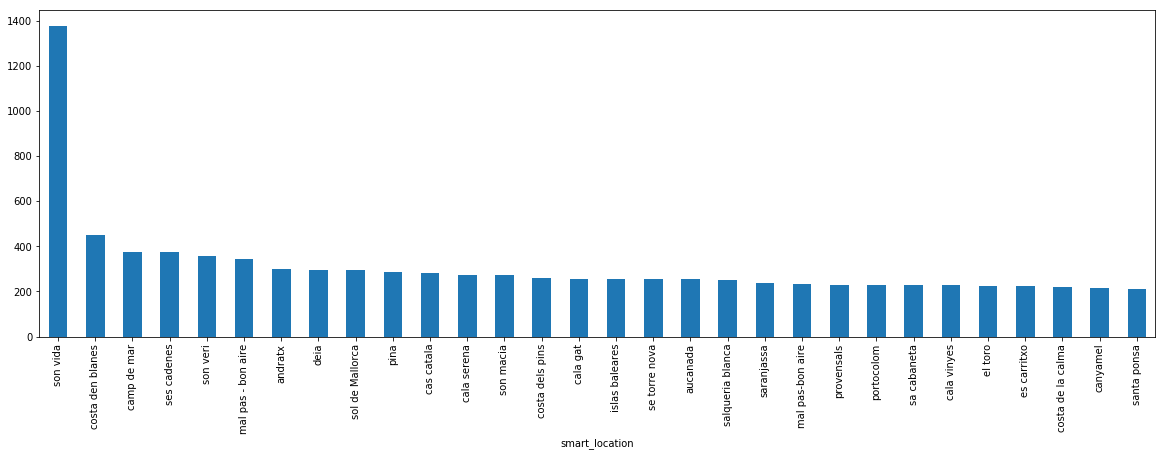

In [453]:
listings.groupby('smart_location')['price'].mean().sort_values(ascending=False).ix[:30].plot(kind='bar',figsize=(20,6))

In [454]:
listings.to_csv('listings_clean.csv')

In [455]:
listing

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_fe

In [465]:
listings.groupby('scrape_id')['id'].apply(len).sort_values(ascending=False)

scrape_id
20170315084710    14858
Name: id, dtype: int64

In [468]:
listings.sort_values('host_listings_count',ascending=False)['host_name'].drop_duplicates()

6493                                  Angela
3044                                 Richard
14242                                Estelle
7081                     Top Villas Mallorca
4608                                    Loic
14435                               Foravila
8263             The Freelance-Holidays Team
2701     Antoni Mallorca Charme Home Rentals
5110                              Anna&Marga
7047                                   Franz
8301     Maria Rosa & Erika (Rent A Villa Ma
5160                 Ideal Property Mallorca
5159                     Priority Apartments
6417                                   Xisco
5066                                Cristina
9316                    Nord Villas Pollensa
5897                 PlanetVillas Vacaciones
652                                  Mathias
12857                               Fincahit
5702                      Be Breeze Mallorca
5367                                    Marc
3764                                  Fátima
2227      